In [1]:
#Setting up my working directory.
import os
os.chdir("C:/Users/user/Desktop/Python")

In [2]:
import pandas as pd #Python library for data analysis.
import matplotlib.pyplot as plt #Library for graphing/data visualization.
from statsmodels.tsa.stattools import adfuller

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#Load the dataset
data = pd.read_csv("Prices.csv")

In [4]:
#Preview the first 5 datapoints of the dataset.
data.head()

,Ticker,SPY
0,12/01/1997,68.10944
1,12/02/1997,67.69718
2,12/03/1997,67.89246
3,12/04/1997,67.82737
4,12/05/1997,68.69528


In [5]:
#Check the information of the dataset
print('Information about the dataset: ')
display(data.info())

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 2 columns):
Ticker    7339 non-null object
SPY       7339 non-null float64
dtypes: float64(1), object(1)
memory usage: 114.8+ KB


None

In [6]:
#Look for missing value
print('Missing values per column: ')
display(pd.isnull(data).sum())

Missing values per column: 


Ticker    0
SPY       0
dtype: int64

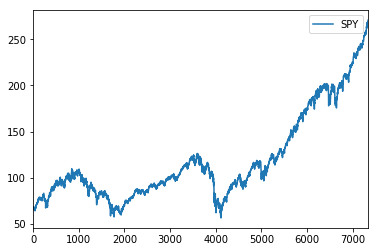

In [7]:
#Initial visualization
data.plot()
plt.show()

In [12]:
#Create a series object (Series is a one-dimensional object that can hold any data type)
series = data['SPY']

In [13]:
#Performing ADF test using adfuller function and autolog='AIC'
#This function will return the output with the best possible AIC score
def adf_test(series):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'P-Value', 'Number of lags', 'Number of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [14]:
#Print the result
adf_test(series)

Results of Augmented Dickey-Fuller test:
Test Statistic               2.134563
P-Value                      0.998824
Number of lags              11.000000
Number of observations    7327.000000
Critical Value (1%)         -3.431243
Critical Value (5%)         -2.861935
Critical Value (10%)        -2.566980
dtype: float64
